# TIM AI Academy

## Demonstração 15 - Engenharia de Atributos em dataset de Telecom.

### Exmplo de algoritmo para classificação de dados de clientes de uma telecom de acordo com sua possibiliade de evasão ou nao do serviço.

Ref. IBM - https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

### Prof. Dr. Ahirton Lopes (https://github.com/ahirtonlopes)

In [97]:
# Importando as bibliotecas necessárias para manipulação dos dados, e plot da arvore de decisão.

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [98]:
# Snippet de código para conexão com dados na máquina local e envio para ambiente do colab

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Usuário fez upload do arquivo "{name}" com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving telecom_data.csv to telecom_data (1).csv
Usuário fez upload do arquivo "telecom_data (1).csv" com tamanho de 977501 bytes


In [99]:
%matplotlib inline # magic command do IPython, usada para exibir gráficos gerados com o Matplotlib diretamente dentro do notebook.
rcParams['figure.figsize'] = 10, 8 # configura a largura e altura padrão dos gráficos gerados pelo Matplotlib.
sb.set_style('whitegrid') # configura o estilo de fundo dos gráficos gerados pelo Seaborn.

In [100]:
# Lendo o conjunto de dados através de um dataframe do pandas.

telco_churn = pd.read_csv('telecom_data.csv')
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
# Verificando o dataframe, e os tipos de dados, bem como se existem valores nulos na base.

telco_churn.info()
telco_churn.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [102]:
# Analisando medidas das tabelas (dando atenção especial ao campo MonthlyCharges)

telco_churn['MonthlyCharges'].describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Descrição dos campos:

gender: Indica se o cliente é do sexo masculino ou feminino (valores: Male/Female)

SeniorCitizen: Indica se o cliente é idoso ou não (1,0)

Partner: Indica se o cliente tem um parceiro ou não (Yes,No)

Dependentes: Indica se o cliente possui dependentes ou não (Yes,No)

tenure: Número de meses que o cliente está com a companhia

PhoneService: Indica se o cliente contratou serviço de telefone ou não (Yes,No)

MultipleLines: Indica se o cliente possui linhas múltiplas (Yes, No, No Phone Service)

InternetService: Indica se o cliente contratou serviço de internet, e o tipo propriamente dito (DSL, Fiber optic, No)

OnlineSecurity: Indica se o cliente contratou segurança online (Yes, No, No internet service)

OnlineBackup: Indica se o cliente contratou backup online (Yes, No, No internet service)

DeviceProtection: Indica se o cliente contratou proteção de dispositivo (Yes, No, No internet service)

TechSupport: Indica se o cliente contratou suporte técnico à internet (Yes, No, No internet service)

StreamingTV: Indica se o cliente contratou serviço de streaming de TV (Yes, No, No internet service)

Streaming Movies: Indica se o cliente contratou serviço de streaming de filmes (Yes, No, No internet service)

Contract: Indica o tipo de contrato do cliente (Month-to-month, One year, Two year)

PaperlessBilling: Indica se o cliente possui fatura sem papel (Yes, No)

PaymentMethod: Indica o método de pagamento que o cliente utiliza (Eletronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: Valor cobrado mensalmente para o cliente

TotalCharges: Valor cumulativo já cobrado ao cliente

Churn: Se o cliente cancelou (Yes,No)


In [103]:
# Criando funções de tratamento, para transformar os valores dos campos, em variáveis numéricas.

def gender(value):
    gender = value.iloc[0]  # Usando iloc para acessar o valor da Série
    if gender == 'Female':
        return 0
    else:
        return 1

def Yes_No(value):
    Yes_No = value.iloc[0]  # Usando iloc para acessar o valor da Série
    if Yes_No == 'Yes':
        return 1
    else:
        return 0

def Internet_Service(value):
    Internet_Service = value.iloc[0]  # Usando iloc para acessar o valor da Série
    if Internet_Service == 'DSL':
        return 1
    elif Internet_Service == 'Fiber optic':
        return 2
    else:
        return 0

def MultipleLines(value):
    MultipleLines = value.iloc[0]  # Usando iloc para acessar o valor da Série
    if MultipleLines == 'Yes':
        return 1
    elif MultipleLines == 'No':
        return 2
    else:
        return 0

def Internet_Services_YesNo(value):
    Internet_Services_YesNo = value.iloc[0]  # Usando iloc para acessar o valor da Série
    if Internet_Services_YesNo == 'Yes':
        return 1
    elif Internet_Services_YesNo == 'No':
        return 2
    else:
        return 0

def Contract(value):
    Contract = value.iloc[0]  # Usando iloc para acessar o valor da Série
    if Contract == 'Month-to-month':
        return 1
    elif Contract == 'One year':
        return 2
    else:
        return 0

def PaymentMethod(value):
    PaymentMethod = value.iloc[0]  # Usando iloc para acessar o valor da Série
    if PaymentMethod == 'Electronic check':
        return 1
    elif PaymentMethod == 'Mailed check':
        return 2
    elif PaymentMethod == 'Credit card (automatic)':
        return 3
    else:
        return 0

def MonthlyCharges(value):
    MonthlyCharges = value.iloc[0]  # Usando iloc para acessar o valor da Série
    if MonthlyCharges <= 70:
        return 1
    else:
        return 0

def tenure(value):
    tenure = value.iloc[0]  # Usando iloc para acessar o valor da Série
    return round(tenure / 12, 0)

In [104]:
# Aplicando a função de transformação dos valores em variáveis numéricas, para aplicar o algoritmo de arvore de decisão.

telco_churn['gender'] = telco_churn[['gender']].apply(gender, axis=1).astype(int)
telco_churn['SeniorCitizen'] = telco_churn['SeniorCitizen'].astype(int)
telco_churn['Partner'] = telco_churn[['Partner']].apply(Yes_No, axis=1).astype(int)
telco_churn['Dependents'] = telco_churn[['Dependents']].apply(Yes_No, axis=1).astype(int)
telco_churn['PhoneService'] = telco_churn[['PhoneService']].apply(Yes_No, axis=1).astype(int)
telco_churn['MultipleLines'] = telco_churn[['MultipleLines']].apply(MultipleLines, axis=1).astype(int)
telco_churn['InternetService'] = telco_churn[['InternetService']].apply(Internet_Service, axis=1).astype(int)
telco_churn['OnlineSecurity'] = telco_churn[['OnlineSecurity']].apply(Internet_Services_YesNo, axis=1).astype(int)
telco_churn['OnlineBackup'] = telco_churn[['OnlineBackup']].apply(Internet_Services_YesNo, axis=1).astype(int)
telco_churn['DeviceProtection'] = telco_churn[['DeviceProtection']].apply(Internet_Services_YesNo, axis=1).astype(int)
telco_churn['TechSupport'] = telco_churn[['TechSupport']].apply(Internet_Services_YesNo, axis=1).astype(int)
telco_churn['StreamingTV'] = telco_churn[['StreamingTV']].apply(Internet_Services_YesNo, axis=1).astype(int)
telco_churn['StreamingMovies'] = telco_churn[['StreamingMovies']].apply(Internet_Services_YesNo, axis=1).astype(int)
telco_churn['Contract'] = telco_churn[['Contract']].apply(Contract, axis=1).astype(int)
telco_churn['PaperlessBilling'] = telco_churn[['PaperlessBilling']].apply(Yes_No, axis=1).astype(int)
telco_churn['PaymentMethod'] = telco_churn[['PaymentMethod']].apply(PaymentMethod, axis=1).astype(int)
telco_churn['MonthlyCharges'] = telco_churn[['MonthlyCharges']].apply(MonthlyCharges, axis=1).astype(int)
telco_churn['Churn'] = telco_churn[['Churn']].apply(Yes_No, axis=1).astype(int)
telco_churn['tenure'] = telco_churn[['tenure']].apply(tenure, axis=1).astype(int)
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   int64 
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   int64 
 4   Dependents        7043 non-null   int64 
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   int64 
 7   MultipleLines     7043 non-null   int64 
 8   InternetService   7043 non-null   int64 
 9   OnlineSecurity    7043 non-null   int64 
 10  OnlineBackup      7043 non-null   int64 
 11  DeviceProtection  7043 non-null   int64 
 12  TechSupport       7043 non-null   int64 
 13  StreamingTV       7043 non-null   int64 
 14  StreamingMovies   7043 non-null   int64 
 15  Contract          7043 non-null   int64 
 16  PaperlessBilling  7043 non-null   int64 
 17  PaymentMethod 

In [105]:
# Validando aplicação das funções

telco_churn['PaymentMethod'].unique()
#telco_churn['tenure'].unique()

array([1, 2, 0, 3])

<Axes: >

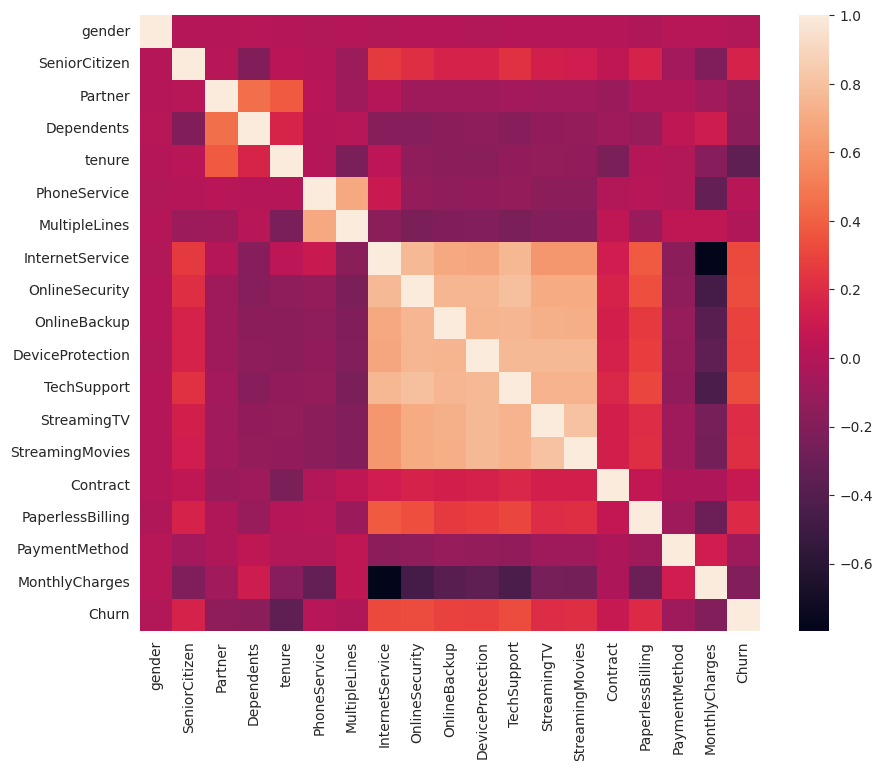

In [106]:
# Analisando correlação das variáveis

numeric_columns = telco_churn.select_dtypes(include=['float64', 'int64']).columns
sb.heatmap(telco_churn[numeric_columns].corr())

In [107]:
# Selecionando somente as variáveis desejadas para aplicação do algorítimo.

telco_churn_2 = telco_churn[['Partner','tenure','PhoneService','InternetService','MonthlyCharges','Churn']]
telco_churn_2.head()

,Partner,tenure,PhoneService,InternetService,MonthlyCharges,Churn
0,1,0,0,1,1,0
1,0,3,1,1,1,0
2,0,0,1,1,1,1
3,0,4,0,1,1,0
4,0,0,1,2,0,1


In [108]:
# Selecionando as variáveis preditoras ou covariáveis

X = telco_churn_2.drop('Churn',axis=1)
X.head()

,Partner,tenure,PhoneService,InternetService,MonthlyCharges
0,1,0,0,1,1
1,0,3,1,1,1
2,0,0,1,1,1
3,0,4,0,1,1
4,0,0,1,2,0


In [109]:
# Selecionando a variável resposta da árvore de decisão

y = telco_churn_2['Churn']
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [110]:
# Dividindo em duas amostras: a primeira para treino e a segunda para validação

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
dtree = DecisionTreeClassifier()

In [112]:
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(predictions)

[0 0 0 ... 0 0 1]


In [113]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



Algoritmo de arvore de decisão, com 80% de precisão!

In [114]:
# Plotando o gráfico do algorítmo de arvore de decisão

!pip install pydot

In [115]:
!pip install graphviz

In [116]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot as pydot

In [117]:
# Variáveis preditoras ou covariáveis

features = list(telco_churn_2.columns[1:])
features

['tenure', 'PhoneService', 'InternetService', 'MonthlyCharges', 'Churn']

In [118]:
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no churn'
y_train_str[y_train_str == '1'] = 'churn'
y_train_str = y_train_str.values
y_train_str

array(['no churn', 'no churn', 'churn', ..., 'no churn', 'churn',
       'no churn'], dtype=object)

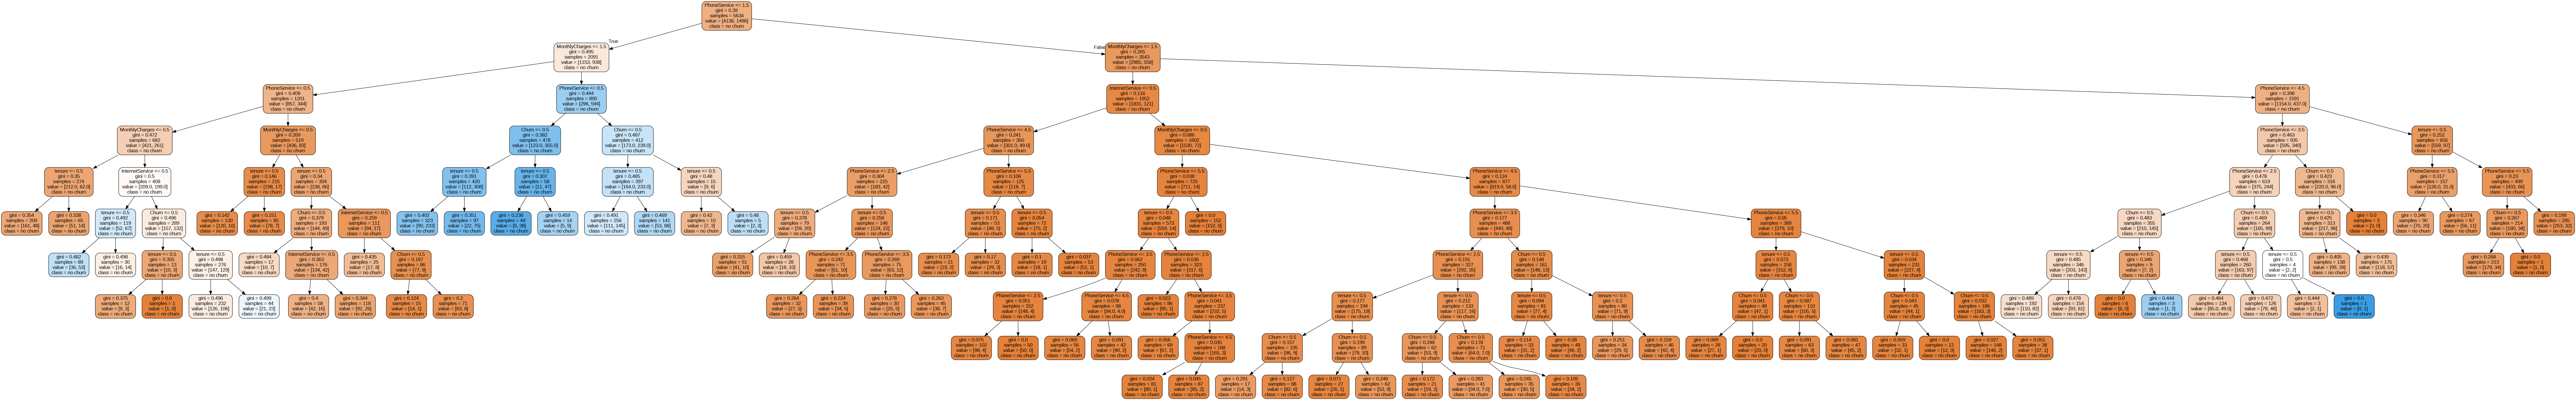

In [119]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,
                feature_names=features,
                class_names=y_train_str,
                filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())